# Converting .wav files to Spectrograms
****

Using techniques from DavidS's notebook at https://www.kaggle.com/davids1992/speech-representation-and-data-exploration/notebook we will be converting the wav files into spectrograms.

We also note that the train/validation split is explained in a txt file.

In [1]:
import matplotlib.pyplot as plt
from matplotlib.backend_bases import RendererBase
from scipy import signal
from scipy.io import wavfile
import librosa

import os
import numpy as np
from PIL import Image
from scipy.fftpack import fft

%matplotlib inline

Our first step is to describe the file path. I will try to keep this repo the same on other machines so this notebook functions normally.

In [2]:
audio_path = 'train/audio/'
specs_path = 'specs/train/'
csv_full_path = 'csv_full/train/'
mfcc_path = 'mfcc/train/'
mfcc_img_path = 'mfcc_img/train/'

test_specs_path = 'specs/test/'
test_audio_path = 'test/audio/'
test_csv_full = 'csv_full/test/'
test_mfcc = 'mfcc/test/'
test_mfcc_img = 'mfcc_img/test'

samples = []

# Here import the train/valid txt file and convert it to an array of file names
# Use the validation txt file.

text_file = open("train/validation_list.txt", "r")
Vali_list = text_file.read().split('\n')
Vali_list[:5]

['bed/026290a7_nohash_0.wav',
 'bed/060cd039_nohash_0.wav',
 'bed/060cd039_nohash_1.wav',
 'bed/099d52ad_nohash_0.wav',
 'bed/0e17f595_nohash_0.wav']

In [3]:
#if not os.path.exists(specs_path):
    #os.makedirs(specs_path)

#if not os.path.exists(test_specs_path):
    #os.makedirs(test_specs_path)
    
#if not os.path.exists(csv_full_path):
    #os.makedirs(csv_full_path)
    
#if not os.path.exists(test_csv_full):
    #os.makedirs(test_csv_full)
    
if not os.path.exists(mfcc_path):
    os.makedirs(mfcc_path)
    
if not os.path.exists(test_mfcc):
    os.makedirs(test_mfcc)


subFolderList = []
for x in os.listdir(audio_path):
    if os.path.isdir(audio_path + '/' + x):
        subFolderList.append(x)
        #if not os.path.exists(specs_path + '/' + x):
            #os.makedirs(specs_path +'/'+ x)
        #if not os.path.exists(csv_full_path + '/' + x):
            #os.makedirs(csv_full_path +'/'+ x)
        if not os.path.exists(mfcc_path + '/' + x):
            os.makedirs(mfcc_path +'/'+ x)
        #if not os.path.exists(mfcc_img_path + '/' + x):
            #os.makedirs(mfcc_img_path +'/'+ x)

The following cell may not be necessary

In [4]:
sample_audio = []
total = 0
for x in subFolderList:
    
    # get all the wave files
    all_files = [y for y in os.listdir(audio_path + x) if '.wav' in y]
    total += len(all_files)
    # collect the first file from each dir
    sample_audio.append(audio_path  + x + '/'+ all_files[0])
    
    # show file counts
    print('count: %d : %s' % (len(all_files), x ))
print(total)

print(subFolderList)

count: 2367 : right
count: 2352 : eight
count: 1733 : cat
count: 1733 : tree
count: 1713 : bed
count: 1742 : happy
count: 2372 : go
count: 402 : silence
count: 1746 : dog
count: 2375 : no
count: 1745 : wow
count: 2364 : nine
count: 2353 : left
count: 2380 : stop
count: 2356 : three
count: 6 : _background_noise_
count: 1734 : sheila
count: 2370 : one
count: 1731 : bird
count: 2376 : zero
count: 2377 : seven
count: 2375 : up
count: 1746 : marvin
count: 2373 : two
count: 1750 : house
count: 2359 : down
count: 2369 : six
count: 2377 : yes
count: 2367 : on
count: 2357 : five
count: 2357 : off
count: 2372 : four
65129
['right', 'eight', 'cat', 'tree', 'bed', 'happy', 'go', 'silence', 'dog', 'no', 'wow', 'nine', 'left', 'stop', 'three', '_background_noise_', 'sheila', 'one', 'bird', 'zero', 'seven', 'up', 'marvin', 'two', 'house', 'down', 'six', 'yes', 'on', 'five', 'off', 'four']


## Spectrum Conversions

****

Here we will used DavidS's function to convert a wav file to a spectrogram

In [5]:
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, _, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, np.log(spec.T.astype(np.float32) + eps)

In [6]:
def log_mfcc(audio, sample_rate, n=128):
    S = librosa.feature.melspectrogram(audio.astype('float32'), sr=sample_rate, n_mels=n)
    log_S = librosa.power_to_db(S, ref=np.max)
    
    return log_S.T

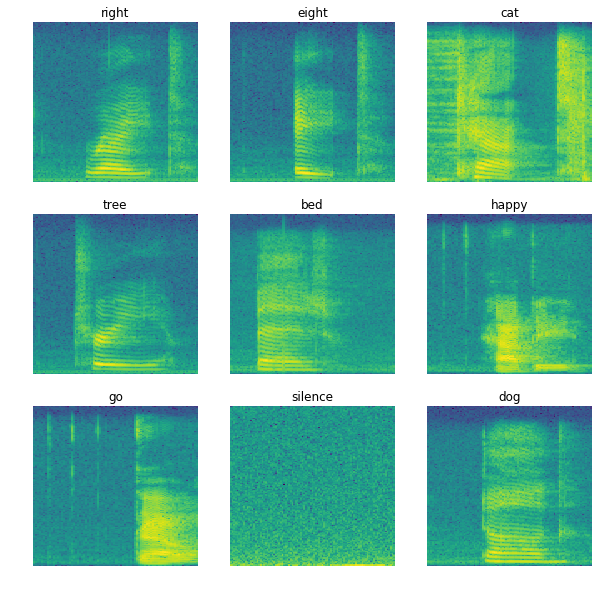

In [7]:
fig = plt.figure(figsize=(10,10))

# for each of the samples
for i, filepath in enumerate(sample_audio[:9]):
    # Make subplots
    plt.subplot(3,3,i+1)
    
    # pull the labels
    label = filepath.split('/')[-2]
    plt.title(label)
    
    # create spectogram
    samplerate, test_sound  = wavfile.read(filepath)
    _, spectrogram = log_specgram(test_sound, samplerate)
    
    plt.imshow(spectrogram.T, aspect='auto', origin='lower')
    plt.axis('off')


In [8]:
samplerate, test_sound  = wavfile.read(sample_audio[0])
_, spectrogram = log_specgram(test_sound, samplerate)

spec_shape = spectrogram.shape
spec_shape

(99, 161)

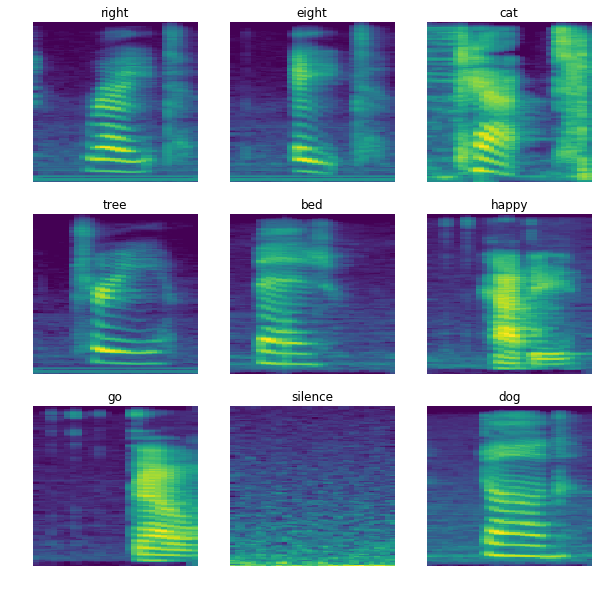

In [9]:
fig = plt.figure(figsize=(10,10))

# for each of the samples
for i, filepath in enumerate(sample_audio[:9]):
    # Make subplots
    plt.subplot(3,3,i+1)
    
    # pull the labels
    label = filepath.split('/')[-2]
    plt.title(label)
    
    # create spectogram
    samplerate, test_sound  = wavfile.read(filepath)
    mfcc = log_mfcc(test_sound, samplerate)
    
    plt.imshow(mfcc.T, aspect='auto', origin='lower')
    plt.axis('off')

In [10]:
samplerate, test_sound  = wavfile.read(sample_audio[0])
mfcc = log_mfcc(test_sound, samplerate)
mfcc_shape = mfcc.shape
mfcc_shape

(32, 128)

### Data Conversion
****
Here we will convert our whole dataset/.

In [11]:
def wav2img(wav_path, targetdir='', figsize=(4,4)):
    """
    takes in wave file path
    and the fig size. Default 4,4 will make images 288 x 288
    """
    from matplotlib.pyplot import cm
    fig = plt.figure(figsize=figsize, frameon=False)
    #plt.gray() # Is there a better way to deal with colour?
    
    
    # use soundfile library to read in the wave files
    samplerate, test_sound  = wavfile.read(wav_path)
    if test_sound.shape[0] == 16000: # Here I'm only taking files that are precisely 1 second
        _, spectrogram = log_specgram(test_sound, samplerate)
    
    ## create output path
        output_file = wav_path.split('/')[-1].split('.wav')[0]
        output_file = targetdir +'/'+ output_file
        #plt.imshow(spectrogram.T, aspect='auto', origin='lower')
        plt.imsave('%s.png' % output_file, spectrogram)
        #plt.savefig('%s.png' % output_file, dpi = 288)
    elif test_sound.shape[0] < 16000:
        _, spectrogram = log_specgram(test_sound, samplerate)
        shape = spec_shape
        return_spec = np.zeros(shape)
        return_spec[:spectrogram.shape[0],:spectrogram.shape[1]] = spectrogram
    ## create output path
        output_file = wav_path.split('/')[-1].split('.wav')[0]
        output_file = targetdir +'/'+ output_file
        #plt.imshow(spectrogram.T, aspect='auto', origin='lower')
        plt.imsave('%s.png' % output_file, return_spec)
        #plt.savefig('%s.png' % output_file, dpi = 288)
        
    plt.close()

In [12]:
def wav2mfccimg(wav_path, targetdir='', figsize=(4,4)):
    """
    takes in wave file path
    and the fig size. Default 4,4 will make images 288 x 288
    """
    from matplotlib.pyplot import cm
    fig = plt.figure(figsize=figsize, frameon=False)
    #plt.gray() # Is there a better way to deal with colour?
    
    
    # use soundfile library to read in the wave files
    samplerate, test_sound  = wavfile.read(wav_path)
    if test_sound.shape[0] == 16000: # Here I'm only taking files that are precisely 1 second
        spec = log_mfcc(test_sound, samplerate)
    
    ## create output path
        output_file = wav_path.split('/')[-1].split('.wav')[0]
        output_file = targetdir +'/'+ output_file
        #plt.imshow(spectrogram.T, aspect='auto', origin='lower')
        plt.imsave('%s.png' % output_file, spec)
        #plt.savefig('%s.png' % output_file, dpi = 288)
    elif test_sound.shape[0] < 16000:
        spec = log_mfcc(test_sound, samplerate)
        shape = mfcc_shape
        return_spec = np.zeros(shape)
        return_spec[:spec.shape[0],:spec.shape[1]] = spec
    ## create output path
        output_file = wav_path.split('/')[-1].split('.wav')[0]
        output_file = targetdir +'/'+ output_file
        #plt.imshow(spectrogram.T, aspect='auto', origin='lower')
        plt.imsave('%s.png' % output_file, return_spec)
        #plt.savefig('%s.png' % output_file, dpi = 288)
        
    plt.close()

In [13]:
def wav2mat_pad(wav_path, targetdir=''):
    from matplotlib.pyplot import cm
    # use soundfile library to read in the wave files
    samplerate, test_sound  = wavfile.read(wav_path)
    if test_sound.shape[0] == 16000: # Here I'm only taking files that are at most 1 second
        _, spec = log_specgram(test_sound, samplerate)
        spec = (spec - spec.min())/(spec.max() - spec.min())
    ## create output path
        output_file = wav_path.split('/')[-1].split('.wav')[0]
        output_file = targetdir +'/'+ output_file
        np.savetxt(output_file, spec.T.flatten(), delimiter=",")
    elif test_sound.shape[0] < 16000:
        _, spec = log_specgram(test_sound, samplerate)
        spec = (spec - spec.min())/(spec.max() - spec.min())
        shape = spec_shape
        return_spec = np.zeros(shape)
        return_spec[:spec.shape[0],:spec.shape[1]] = spec
    ## create output path
        output_file = wav_path.split('/')[-1].split('.wav')[0]
        output_file = targetdir +'/'+ output_file
        np.savetxt(output_file, return_spec.T.flatten(), delimiter=",")
        
    plt.close()

In [14]:
def wav2mfcc_pad(wav_path, targetdir=''):
    from matplotlib.pyplot import cm
    # use soundfile library to read in the wave files
    samplerate, test_sound  = wavfile.read(wav_path)
    if test_sound.shape[0] == 16000: # Here I'm only taking files that are at most 1 second
        spec = log_mfcc(test_sound, samplerate)
        spec = (spec - spec.min())/(spec.max() - spec.min())
    ## create output path
        output_file = wav_path.split('/')[-1].split('.wav')[0]
        output_file = targetdir +'/'+ output_file
        np.savetxt(output_file, spec.T.flatten(), delimiter=",")
    elif test_sound.shape[0] < 16000:
        spec = log_mfcc(test_sound, samplerate)
        spec = (spec - spec.min())/(spec.max() - spec.min())
        shape = mfcc_shape
        return_spec = np.zeros(shape)
        return_spec[:spec.shape[0],:spec.shape[1]] = spec
    ## create output path
        output_file = wav_path.split('/')[-1].split('.wav')[0]
        output_file = targetdir +'/'+ output_file
        np.savetxt(output_file, return_spec.T.flatten(), delimiter=",")
        
    plt.close()

# Convert Training Data
****
The following methods convert the raw data into the required data types. They are saved as markdown cells which should be changed to code to run.

#### Set as code to create the data

## Convert spectrogram to csv file
for i, x in enumerate(subFolderList):
    print(i, ':', x)
    # get all the wave files
    all_files = [y for y in os.listdir(audio_path + x) if '.wav' in y]
    for file in all_files:
        wav2mat_pad(audio_path + x + '/' + file, csv_full_path + x)

In [15]:
#### Set as code to create the data

## Convert MFCC to csv file
for i, x in enumerate(subFolderList):
    # get all the wave files
    all_files = [y for y in os.listdir(audio_path + x) if '.wav' in y]
    
    print(i, ':', x, ':', len(all_files))
    for file in all_files:
        wav2mfcc_pad(audio_path + x + '/' + file, mfcc_path + x)

0 : right : 2367
1 : eight : 2352
2 : cat : 1733
3 : tree : 1733
4 : bed : 1713
5 : happy : 1742
6 : go : 2372
7 : silence : 402
8 : dog : 1746
9 : no : 2375
10 : wow : 1745
11 : nine : 2364
12 : left : 2353
13 : stop : 2380
14 : three : 2356
15 : _background_noise_ : 6
16 : sheila : 1734


/Users/Eric/anaconda3/lib/python3.6/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


17 : one : 2370
18 : bird : 1731


/Users/Eric/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


19 : zero : 2376
20 : seven : 2377
21 : up : 2375
22 : marvin : 1746
23 : two : 2373
24 : house : 1750
25 : down : 2359
26 : six : 2369
27 : yes : 2377
28 : on : 2367
29 : five : 2357
30 : off : 2357
31 : four : 2372


#### Set as code to create the data

## Convert spectrogram to png file
for i, x in enumerate(subFolderList):
    print(i, ':', x)
    # get all the wave files
    all_files = [y for y in os.listdir(audio_path + x) if '.wav' in y]
    for file in all_files:
        wav2img(audio_path + x + '/' + file, specs_path + x)

#### Set as code to create the data

## Convert mfcc to png file
for i, x in enumerate(subFolderList):
    print(i, ':', x)
    # get all the wave files
    all_files = [y for y in os.listdir(audio_path + x) if '.wav' in y]
    for file in all_files:
        wav2mfccimg(audio_path + x + '/' + file, mfcc_img_path + x)

Convert Testing Data

all_files = [y for y in os.listdir(test_audio_path) if '.wav' in y]
for file in all_files:
    wav2mfcc_pad(test_audio_path + '/' + file, test_mfcc)

all_files = [y for y in os.listdir(test_audio_path) if '.wav' in y]
for file in all_files:
    wav2img(test_audio_path + '/' + file, test_specs_path)

all_files = [y for y in os.listdir(test_audio_path) if '.wav' in y]
for file in all_files:
    wav2mat_pad(test_audio_path + '/' + file, test_csv_full)

all_files = [y for y in os.listdir(test_audio_path) if '.wav' in y]
for file in all_files:
    wav2mfccimg(test_audio_path + '/' + file, test_mfcc_img)